In [51]:
# imports and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from funs import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


pd.set_option('display.max_rows', 5)
%matplotlib inline

In [2]:
# Reading data
file_path = './train.csv'
DF = pd.read_csv(file_path, lineterminator='\n')

In [3]:
DF.head()
# DF.shape
# DF.columns

X = DF['review']
y = DF['label'] == 'Positive'

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [48]:
# # data cleaning
# num_reviews = X_train.size
# clean_train_reviews = []
# for i in range(num_reviews):
#     if i % 1000 == 0:
#         print('Processing review %d of %f' % (i, num_reviews))
#     clean_train_reviews.append(process_review(X_train.iloc[i]))
# len(clean_train_reviews)

# data cleaning without dealing with capta
# actually doesn't do anything
def process_reviews(foo):
    pass
num_reviews = X_train.size
clean_train_reviews = []
for i in range(num_reviews):
    if i % 1000 == 0:
        print('Processing review %d of %f' % (i, num_reviews))
    clean_train_reviews.append(process_review(X_train.iloc[i]))
len(clean_train_reviews)

Processing review 0 of 4746.000000
Processing review 1000 of 4746.000000
Processing review 2000 of 4746.000000
Processing review 3000 of 4746.000000
Processing review 4000 of 4746.000000


4746

In [5]:
# Creating bag of words
vectorizer = CountVectorizer(analyzer='word', max_features=500) # this one doesn't seem to be good enough

In [6]:
train_data_features = vectorizer.fit_transform(clean_train_reviews)
train_data_features = train_data_features.toarray()

In [52]:
# train_data_features.shape
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
vocab = vectorizer.get_feature_names()# 1 * 10000 list
# vocab

In [9]:
# dist = np.sum(train_data_features, axis=0)
# for tag, count in zip(vocab, dist):
#     print(tag, count)

In [10]:
# testing on random forest
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(train_data_features, y_train)

In [11]:
# testing AUC
num_reviews = X_test.size
clean_test_reviews = []
for i in range(num_reviews):
    clean_test_reviews.append(process_review(X_test.iloc[i]))

test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

In [12]:
# train_predictions = forest.predict(train_data_features)
train_predictions = forest.predict_proba(train_data_features)
# test_predictions = forest.predict(test_data_features)
test_predictions = forest.predict_proba(test_data_features)
# print (test_predictions, test_predictions[:, 1])

In [13]:
train_score = roc_auc_score(y_train, train_predictions[:, 1])
test_score = roc_auc_score(y_test, test_predictions[:, 1])
print ('train auc: %.3f, test auc: %.3f' % (train_score, test_score))
# not good

train auc: 0.998, test auc: 0.770


In [14]:
# very slow
# svc = SVC(probability=True)
# svc.fit(train_data_features, y_train)

In [15]:
# train_predictions = svc.predict_proba(train_data_features)
# train_predictions
# test_predictions = svc.predict_proba(test_data_features)
# train_score = roc_auc_score(y_train, train_predictions[:, 1])
# test_score = roc_auc_score(y_test, test_predictions[:, 1])

In [16]:
# print ('train auc: %.3f, test auc: %.3f' % (train_score, test_score))

In [17]:
# No SVC!!

In [18]:
# Linear SVC
# lsvc = LinearSVC(max_iter=4000)
# lsvc = SVC(kernel='linear', probability=True)
# lsvc.fit(train_data_features, y_train)

In [19]:
# train_predictions = lsvc.predict_proba(train_data_features)
# test_predictions = lsvc.predict_proba(test_data_features)

In [20]:
# train_score = roc_auc_score(y_train, train_predictions[:, 1])
# test_score = roc_auc_score(y_test, test_predictions[:, 1])

In [21]:
# print ('trian auc: %.3f, test auc: %.3f' % (train_score, test_score))

In [22]:
lr = LogisticRegression()
lr.fit(train_data_features, y_train)

D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
train_predictions = lr.predict_proba(train_data_features)
test_predictions = lr.predict_proba(test_data_features)

In [24]:
train_score = roc_auc_score(y_train, train_predictions[:, 1])
test_score = roc_auc_score(y_test, test_predictions[:, 1])

In [25]:
print ('train auc: %.3f, test auc: %.3f' % (train_score, test_score))

train auc: 0.859, test auc: 0.789


In [26]:
# fine tuning for lr
def get_auc(clf, X, y):
    predictions = clf.predict_proba(X)[:, 1]
    score = roc_auc_score(y, predictions)
    return score

def show_results(train_score, test_score):
    print ('train auc: %.3f, test auc: %.3f' % (train_score, test_score))

In [27]:
# testing penalties
lr = LogisticRegression(penalty='l1')
lr.fit(train_data_features, y_train)
show_results(get_auc(lr, train_data_features, y_train), get_auc(lr, test_data_features, y_test))

# looks like no big different

train auc: 0.858, test auc: 0.787


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
# trying changing number of features
def solve(lr, num_features):
    vectorizer = CountVectorizer(analyzer='word', max_features=num_features)
    train_data_features = vectorizer.fit_transform(clean_train_reviews)
    train_data_features = train_data_features.toarray()
    
    lr.fit(train_data_features, y_train)
    
    test_data_features = vectorizer.transform(clean_test_reviews)
    test_data_feastures = test_data_features.toarray()
    
    train_score = get_auc(lr, train_data_features, y_train)
    test_score = get_auc(lr, test_data_features, y_test)
    show_results(train_score, test_score)
    
    return train_score, test_score

In [35]:
lr = LogisticRegression()
results = {'train': {}, 'test': {}}
for num_features in range(500, 10001, 500):
    print ('number of features: %d' % (num_features))
    train_score, test_score = solve(lr, num_features)
    results['train'][num_features] = train_score
    results['test'][num_features] = test_score
    
    # for which, score in zip(['train', 'test'], [train_score, test_score]):
    #     results[which][num_features] = score

number of features: 500
train auc: 0.859, test auc: 0.789

D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



number of features: 1000
train auc: 0.917, test auc: 0.811

D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



number of features: 1500


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.947, test auc: 0.814
number of features: 2000


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.963, test auc: 0.816
number of features: 2500


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.974, test auc: 0.823
number of features: 3000


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.979, test auc: 0.828
number of features: 3500


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.984, test auc: 0.829
number of features: 4000


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.988, test auc: 0.831
number of features: 4500


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.990, test auc: 0.832
number of features: 5000


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.992, test auc: 0.832
number of features: 5500


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.993, test auc: 0.834
number of features: 6000


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.994, test auc: 0.836
number of features: 6500


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.995, test auc: 0.836
number of features: 7000


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.995, test auc: 0.835
number of features: 7500


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.996, test auc: 0.836
number of features: 8000


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.996, test auc: 0.836
number of features: 8500


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.996, test auc: 0.837
number of features: 9000


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.997, test auc: 0.837
number of features: 9500


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.997, test auc: 0.837
number of features: 10000


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.997, test auc: 0.838


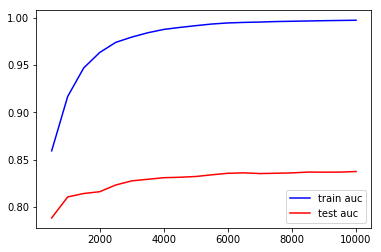

In [36]:
plt.plot([num_features for num_features in range(500, 10001, 500)], \
    [results['train'][num_features] for num_features in range(500, 10001, 500)], \
        label='train auc', color='blue')
plt.plot([num_features for num_features in range(500, 10001, 500)], \
    [results['test'][num_features] for num_features in range(500, 10001, 500)], \
        label='test auc', color='red')
plt.legend(loc='best')
plt.show()

In [37]:
num_features = 5000
show_results(results['train'][num_features], results['test'][num_features])

train auc: 0.992, test auc: 0.832


In [38]:
# fine tuning on LR parameter C
old_solve = solve
def new_solve(C):
    lr = LogisticRegression(C=C)
    return old_solve(lr, num_features)
solve = new_solve

In [40]:
results = {'train': {}, 'test': {}}
for C in np.arange(0.5, 1.5, 0.05):
    print ('C: %.3f' %  (C))
    train_score, test_score = solve(C)
    results['train'][C] = train_score
    results['test'][C] = test_score
    
# i don't really get it 

C: 0.500


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.981, test auc: 0.834
C: 0.550


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.983, test auc: 0.834
C: 0.600


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.984, test auc: 0.834
C: 0.650


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.986, test auc: 0.834
C: 0.700


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.987, test auc: 0.834
C: 0.750


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.988, test auc: 0.833
C: 0.800


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.989, test auc: 0.833
C: 0.850


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.990, test auc: 0.833
C: 0.900


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.990, test auc: 0.833
C: 0.950


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.991, test auc: 0.833
C: 1.000


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.992, test auc: 0.832
C: 1.050


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.992, test auc: 0.832
C: 1.100


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.992, test auc: 0.832
C: 1.150


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.993, test auc: 0.832
C: 1.200


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.993, test auc: 0.831
C: 1.250


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.994, test auc: 0.831
C: 1.300


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.994, test auc: 0.831
C: 1.350


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.994, test auc: 0.831
C: 1.400


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.994, test auc: 0.831
C: 1.450


D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.995, test auc: 0.831


In [49]:
# how about i set C to 0.85?
solve = old_solve
# lr = LogisticRegression(C=0.85)
# lr = LogisticRegression(C=0.85, penalty='l1') # worse
# lr = LogisticRegression(C=0.85, max_iter=500) # doesn't seem changing
lr = LogisticRegression(C=0.85)
solve(lr, num_features)

D:\Anaconda\Install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train auc: 0.990, test auc: 0.833


(0.9897199760407307, 0.8329979572547944)

Processing review 0 of 4746.000000
Processing review 1000 of 4746.000000
Processing review 2000 of 4746.000000
Processing review 3000 of 4746.000000
Processing review 4000 of 4746.000000


4746